In [ ]:
# %% [markdown]
# # Walmart Sales Data Analysis
# 
# This notebook analyzes Walmart's sales data to identify trends, seasonality, and patterns across different stores.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv(r"D:\Internship\Walmart.csv")

# Display basic info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# %% [markdown]
# ## 2. Data Preprocessing

# %%
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Sort by date
df.sort_index(inplace=True)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Add Month and Year columns for analysis
df['Month'] = df.index.month
df['Year'] = df.index.year


Missing values per column:
Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


C:\Users\Ali Asjad\AppData\Local\Temp\ipykernel_15660\1476282804.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M')['Weekly_Sales'].sum()


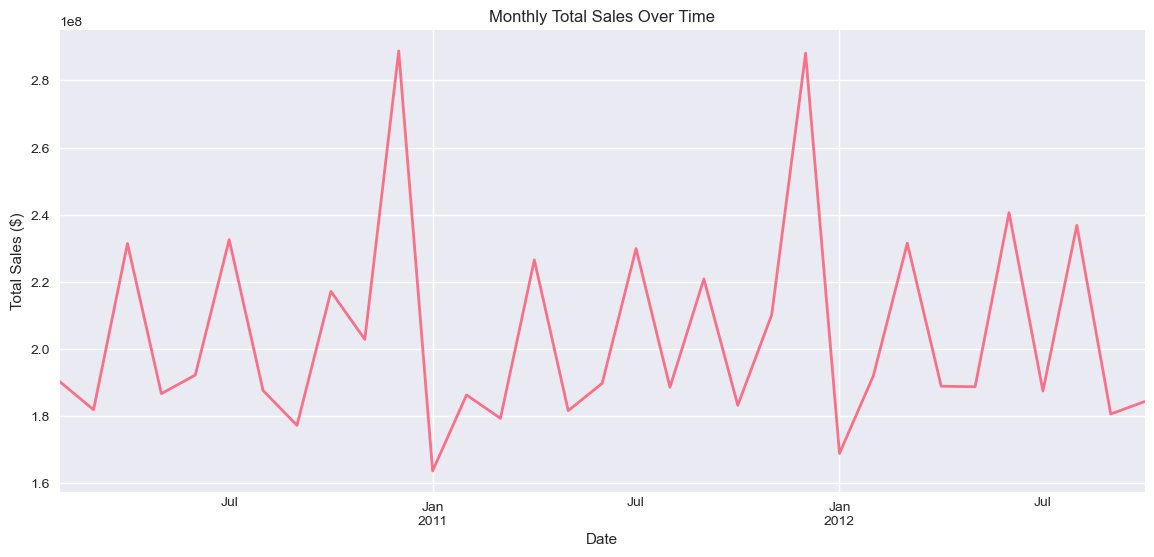

In [7]:
# %% [markdown]
# ## 3. Overall Sales Trends

# %%
# Resample to monthly sales for trend analysis
monthly_sales = df.resample('M')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 6))
monthly_sales.plot(title='Monthly Total Sales Over Time', linewidth=2)
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

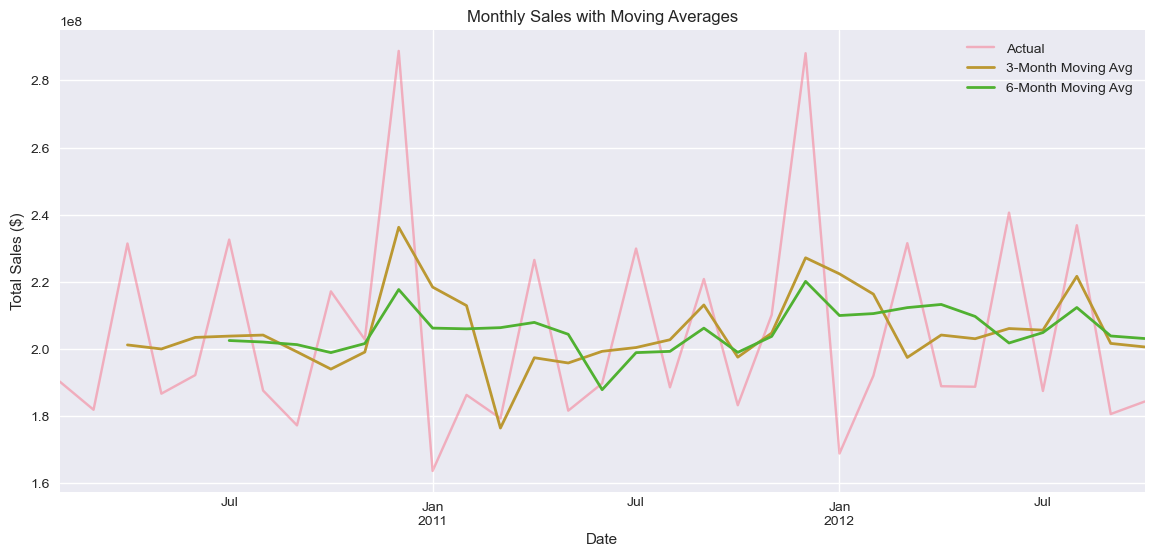

In [8]:

# %% [markdown]
# ## 4. Moving Averages

# %%
# Calculate moving averages
monthly_sales_3m = monthly_sales.rolling(window=3).mean()
monthly_sales_6m = monthly_sales.rolling(window=6).mean()

plt.figure(figsize=(14, 6))
monthly_sales.plot(label='Actual', alpha=0.5)
monthly_sales_3m.plot(label='3-Month Moving Avg', linewidth=2)
monthly_sales_6m.plot(label='6-Month Moving Avg', linewidth=2)
plt.title('Monthly Sales with Moving Averages')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

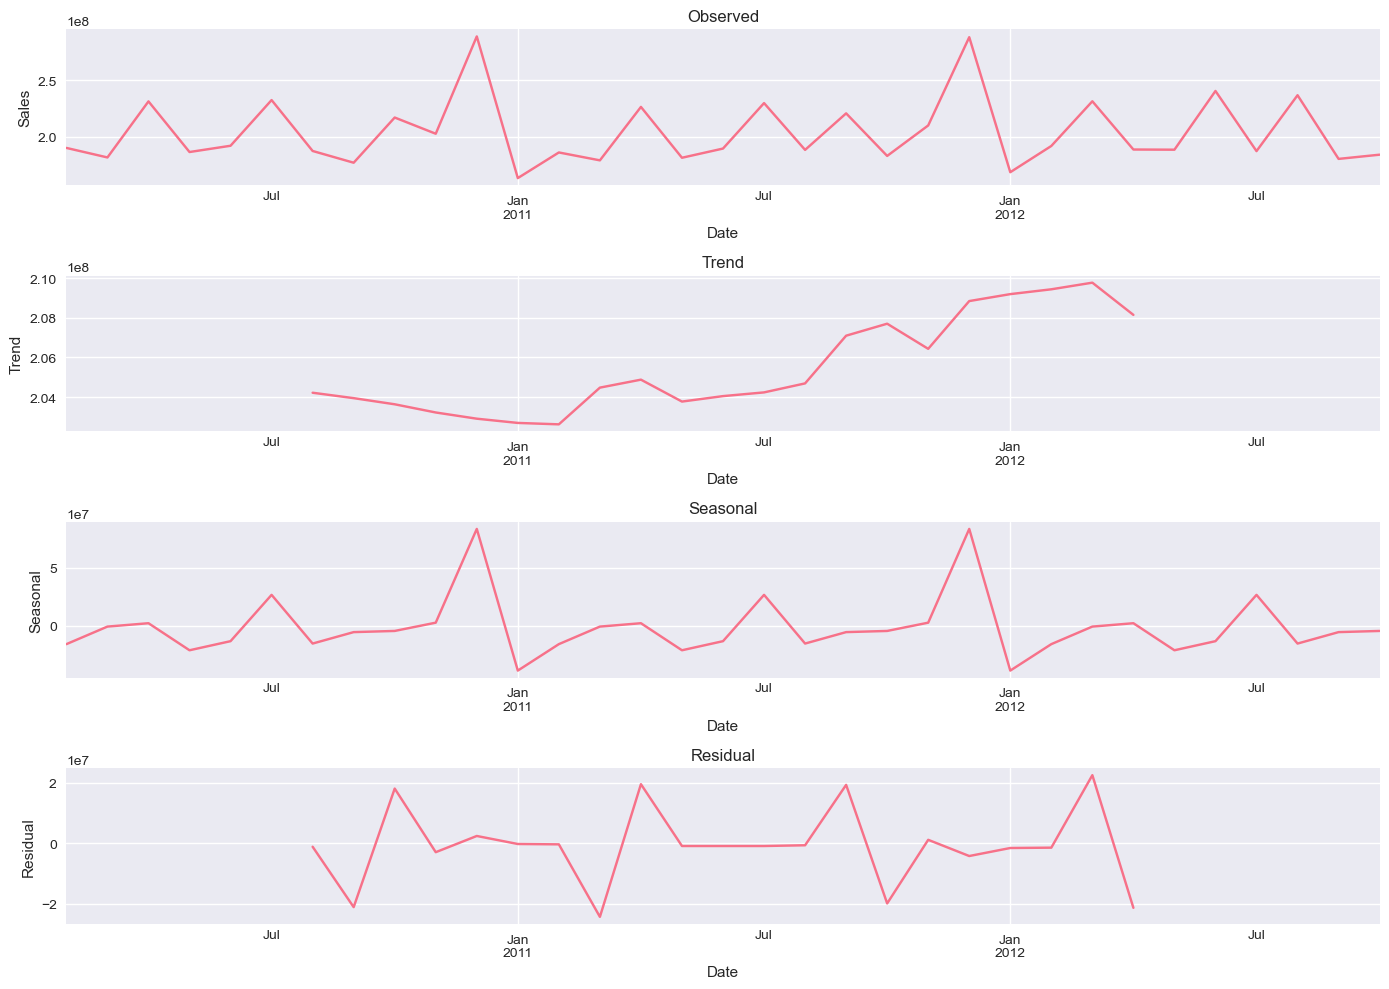

In [9]:
# %% [markdown]
# ## 5. Seasonal Decomposition

# %%
# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)

plt.figure(figsize=(14, 10))

plt.subplot(411)
decomposition.observed.plot(title='Observed', ax=plt.gca())
plt.ylabel('Sales')

plt.subplot(412)
decomposition.trend.plot(title='Trend', ax=plt.gca())
plt.ylabel('Trend')

plt.subplot(413)
decomposition.seasonal.plot(title='Seasonal', ax=plt.gca())
plt.ylabel('Seasonal')

plt.subplot(414)
decomposition.resid.plot(title='Residual', ax=plt.gca())
plt.ylabel('Residual')

plt.tight_layout()
plt.show()

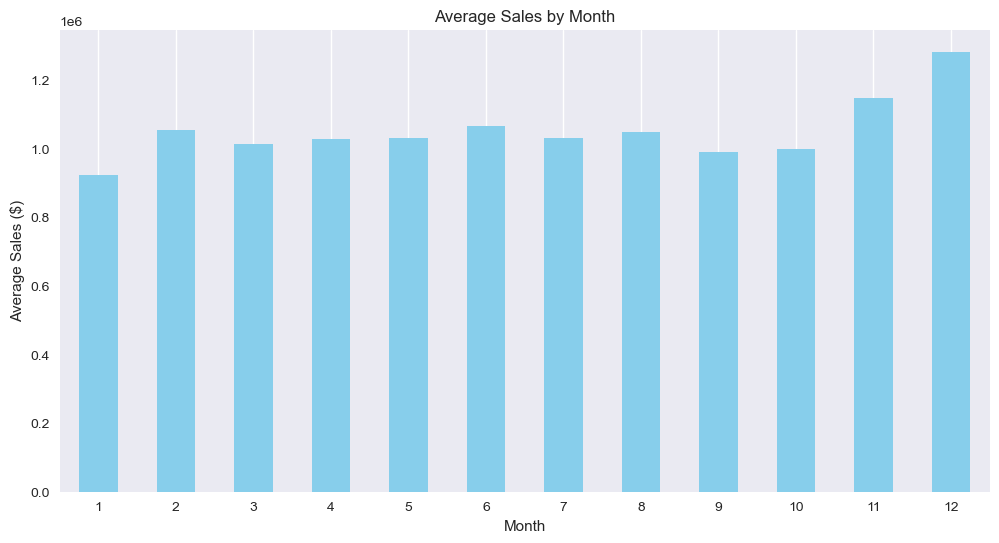

In [10]:
# %% [markdown]
# ## 6. Seasonal Patterns by Month

# %%
# Average sales by month
monthly_avg = df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

C:\Users\Ali Asjad\AppData\Local\Temp\ipykernel_15660\3971892097.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales = df.groupby(['Store', pd.Grouper(freq='M')])['Weekly_Sales'].sum().unstack(level=0)


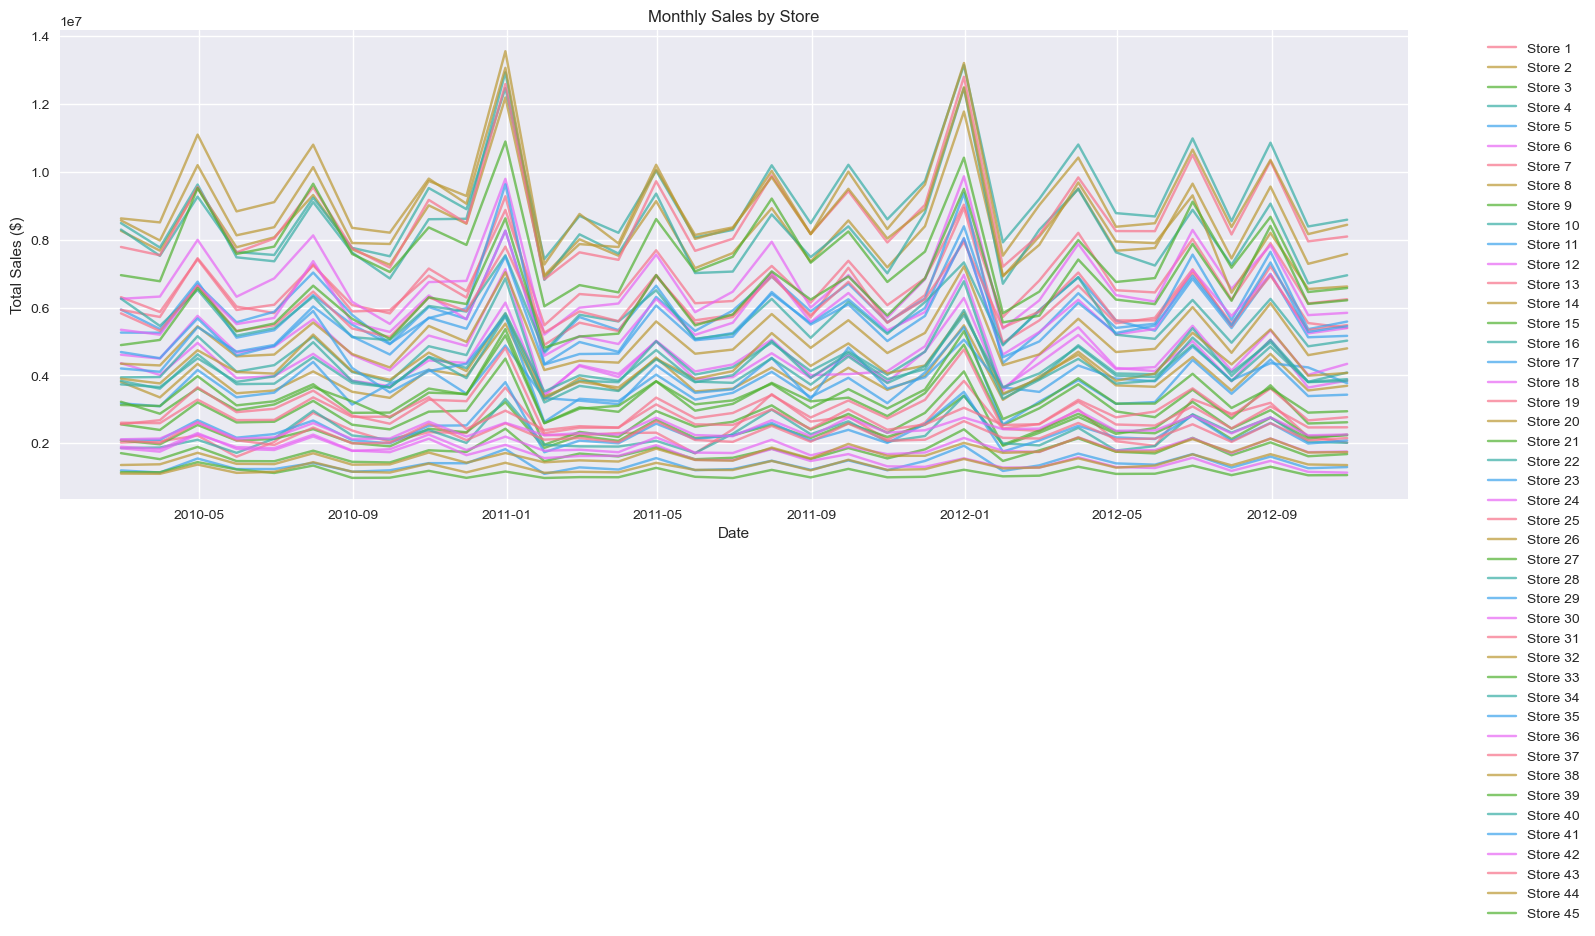

In [11]:
# %% [markdown]
# ## 7. Sales by Store Over Time

# %%
# Sales by store over time
store_sales = df.groupby(['Store', pd.Grouper(freq='M')])['Weekly_Sales'].sum().unstack(level=0)

plt.figure(figsize=(16, 8))
for store in store_sales.columns:
    plt.plot(store_sales.index, store_sales[store], label=f'Store {store}', alpha=0.7)

plt.title('Monthly Sales by Store')
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

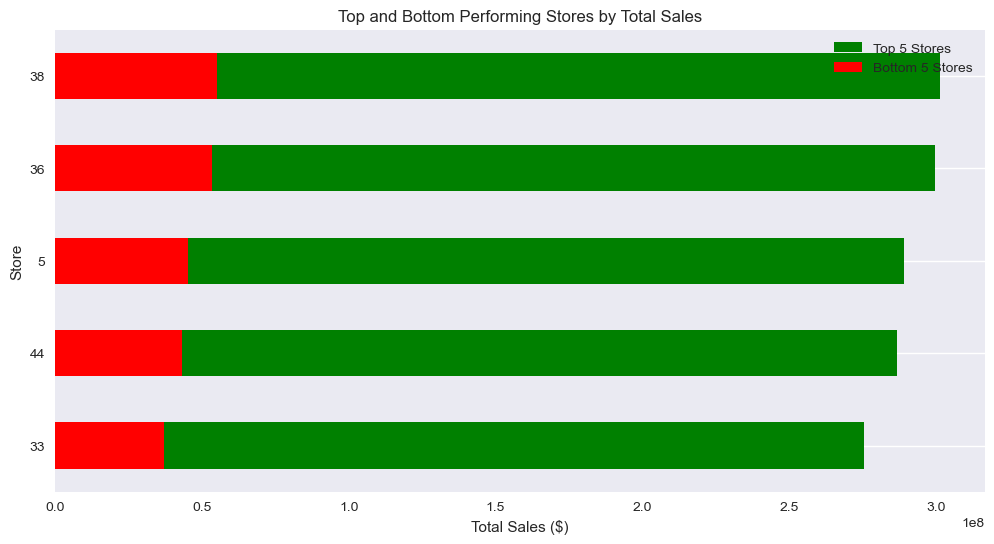

In [12]:
# %% [markdown]
# ## 8. Top and Bottom Performing Stores

# %%
# Total sales by store
total_sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values()

# Plot top and bottom stores
plt.figure(figsize=(12, 6))
total_sales_by_store.tail(5).plot(kind='barh', color='green', label='Top 5 Stores')
total_sales_by_store.head(5).plot(kind='barh', color='red', label='Bottom 5 Stores')
plt.title('Top and Bottom Performing Stores by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Store')
plt.legend()
plt.grid(axis='x')
plt.show()

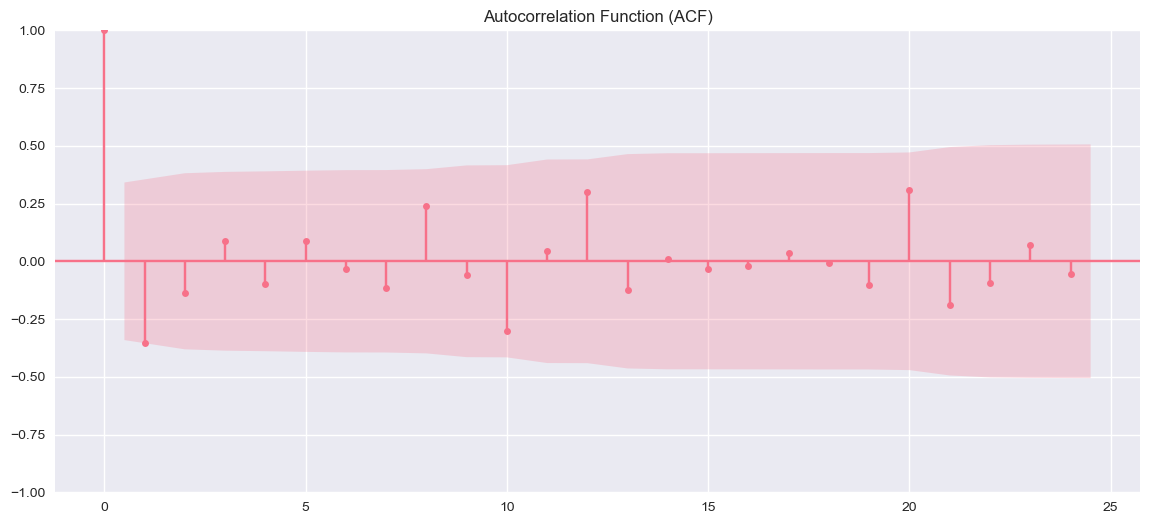

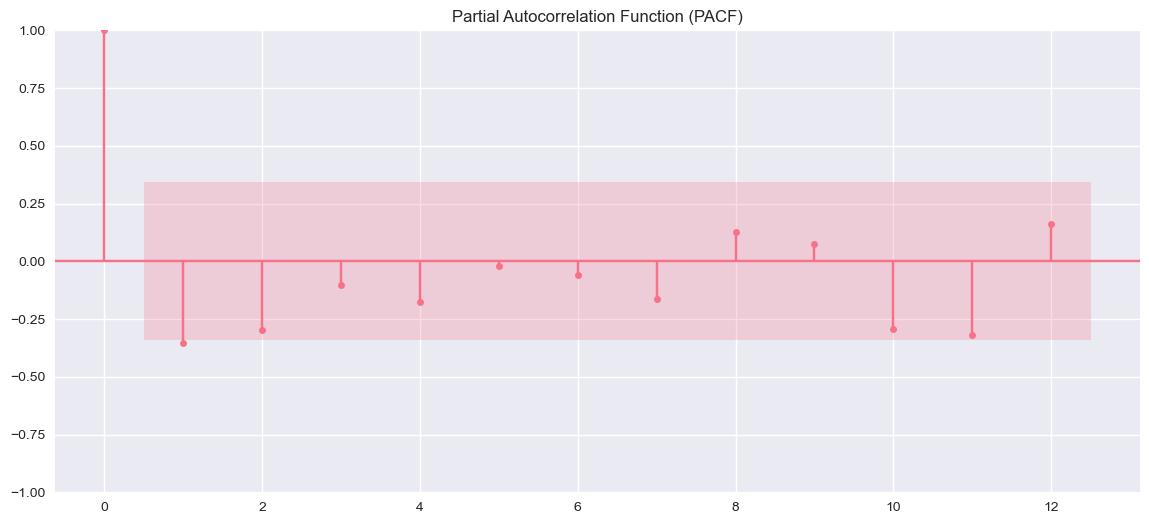

In [14]:
# %% [markdown]
# ## 9. Autocorrelation Analysis

# %%
# Plot ACF and PACF
plt.figure(figsize=(14, 6))
plot_acf(monthly_sales, lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(14, 6))
plot_pacf(monthly_sales, lags=12, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

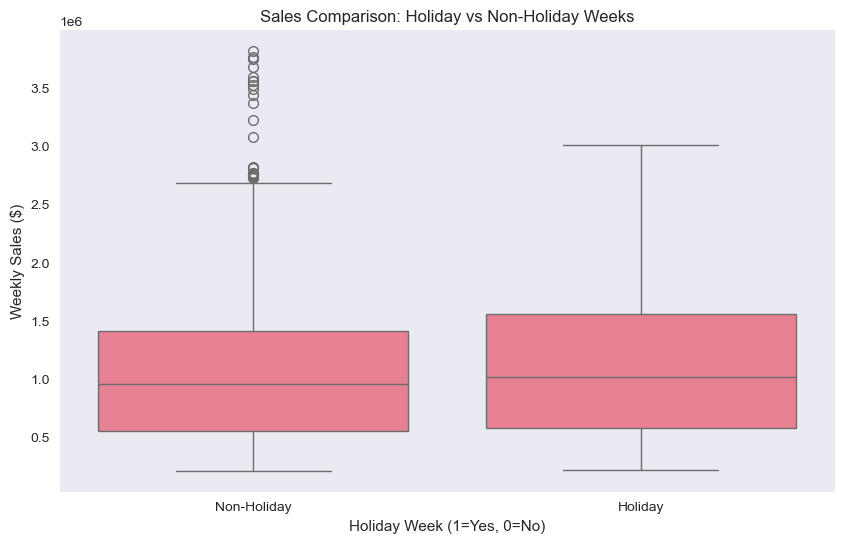

In [15]:
# %% [markdown]
# ## 10. Holiday Impact Analysis

# %%
# Compare holiday vs non-holiday sales
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title('Sales Comparison: Holiday vs Non-Holiday Weeks')
plt.xlabel('Holiday Week (1=Yes, 0=No)')
plt.ylabel('Weekly Sales ($)')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.grid(axis='y')
plt.show()

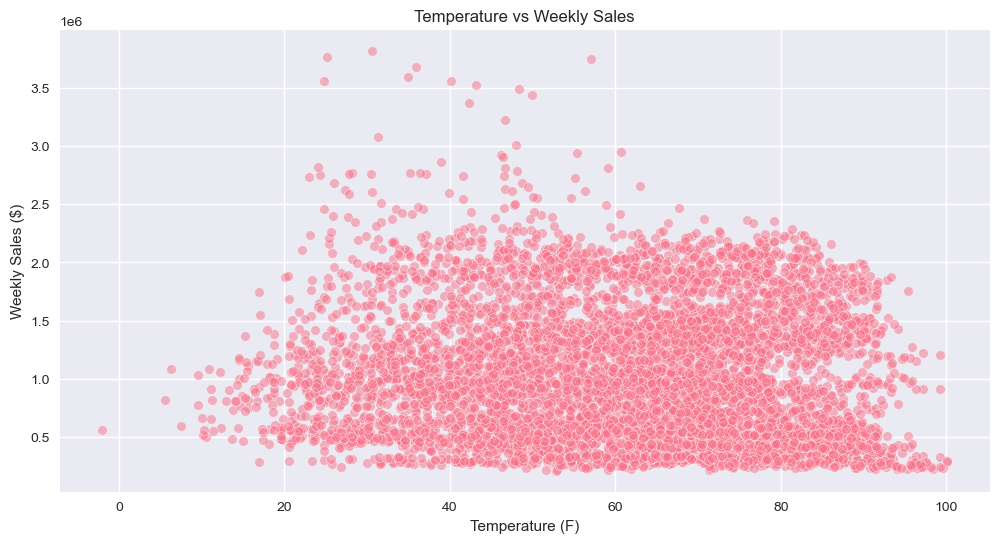

In [16]:
# %% [markdown]
# ## 11. Temperature vs Sales

# %%
# Temperature vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Temperature vs Weekly Sales')
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales ($)')
plt.grid(True)
plt.show()

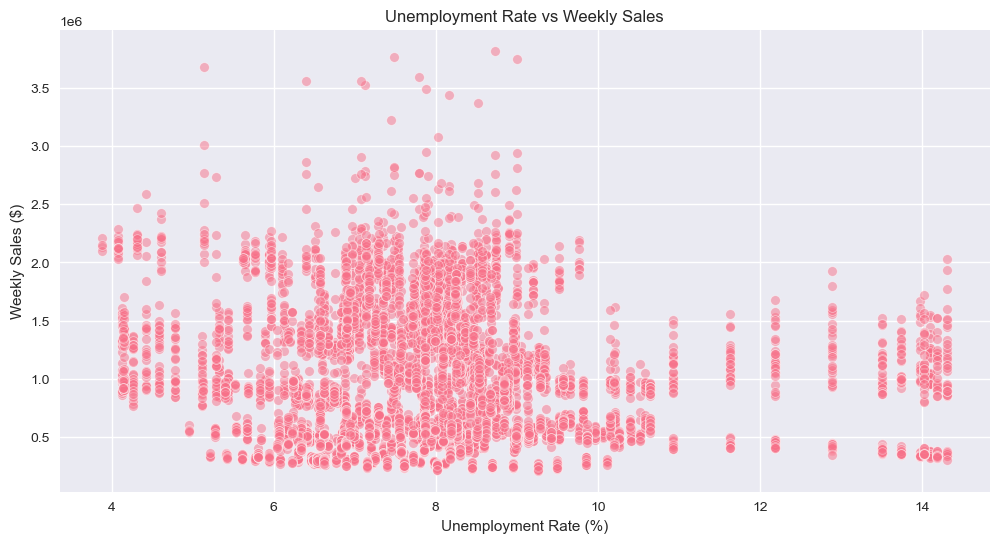

In [17]:
# %% [markdown]
# ## 12. Unemployment vs Sales

# %%
# Unemployment vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, alpha=0.5)
plt.title('Unemployment Rate vs Weekly Sales')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales ($)')
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

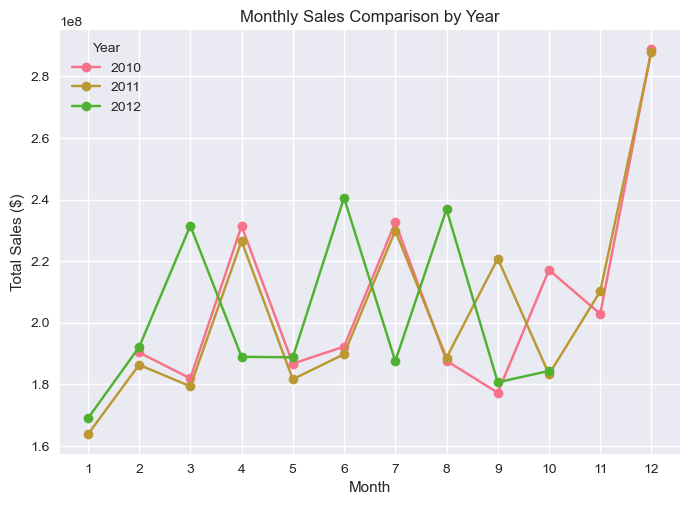

In [18]:
# %% [markdown]
# ## 13. Year-over-Year Comparison

# %%
# Year-over-year comparison
yearly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().unstack(level=0)

plt.figure(figsize=(14, 8))
yearly_sales.plot(marker='o')
plt.title('Monthly Sales Comparison by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(title='Year')
plt.show()

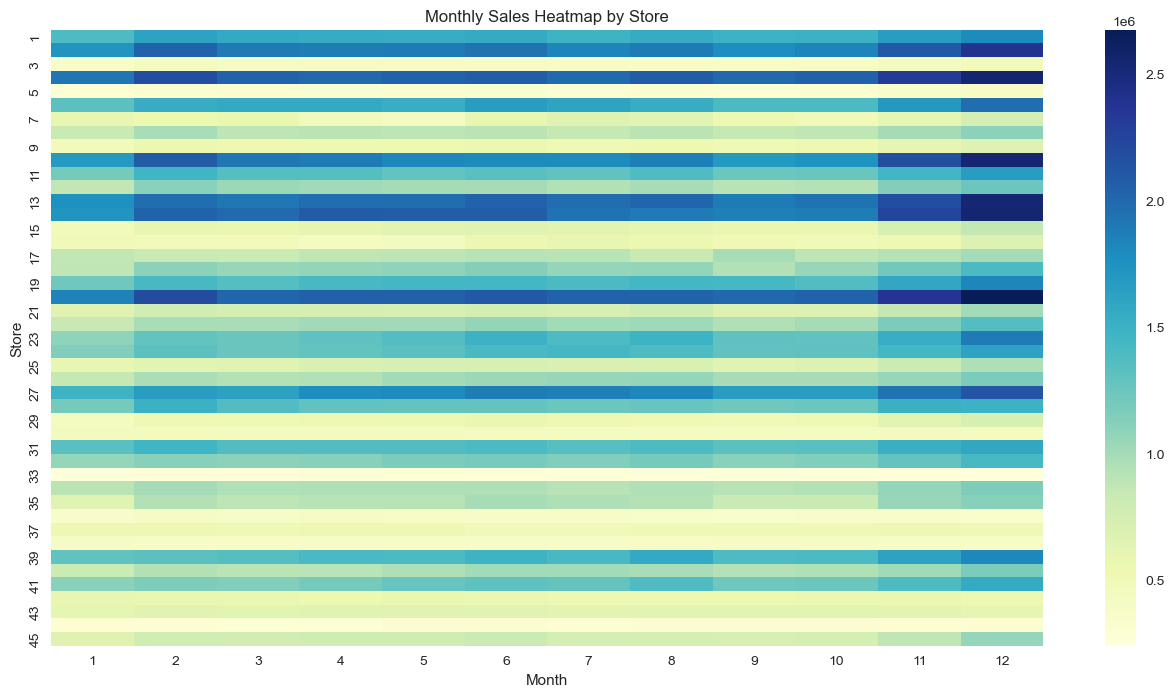

In [19]:
# %% [markdown]
# ## 14. Store Performance Heatmap

# %%
# Monthly sales heatmap by store
store_monthly_sales = df.groupby(['Store', 'Month'])['Weekly_Sales'].mean().unstack(level=0)

plt.figure(figsize=(16, 8))
sns.heatmap(store_monthly_sales.T, cmap='YlGnBu', annot=False)
plt.title('Monthly Sales Heatmap by Store')
plt.xlabel('Month')
plt.ylabel('Store')
plt.show()

In [20]:
# %% [markdown]
# ## Key Findings:
# 
# 1. **Trend**: The data shows an overall increasing trend in sales over time.
# 2. **Seasonality**: Strong seasonal patterns are evident, with peaks during holiday periods (November-December).
# 3. **Store Performance**: Significant variation exists between stores, with some consistently outperforming others.
# 4. **Holiday Impact**: Sales are generally higher during holiday weeks.
# 5. **Temperature**: There appears to be a relationship between temperature and sales, though not perfectly linear.
# 6. **Unemployment**: Higher unemployment rates seem to correlate with lower sales.